In [1]:
import numpy as np
import extq
import matplotlib.pyplot as plt
from matplotlib import ticker
import pyemma
import glob
import sys
import importlib
import gc
import sklearn
from sklearn import metrics

In [2]:
sys.path.insert(1, "../python")
sys.path.insert(1, "../..")
import util
import kde

In [3]:
import seaborn as sns

plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load feature 2 data (salt bridges)

In [5]:
with np.load("../data/raw_feat/feat2_raw.npz", allow_pickle=True) as f:
    data = f["arr_0"]

In [6]:
print(len(data))
print(data[0].shape)

1295
(3000, 60)


In [7]:
data_arr = np.concatenate(data)
print(data_arr.shape)

(6580000, 60)


## load CVs 

In [8]:
with np.load("../data/raw_feat/cv_dist_spin.npz", allow_pickle=True) as f:
    cv_arr = f["arr_0"]

In [9]:
traj_lens = [len(traj) for traj in data]
traj_inds = []
subtot = 0
for length in traj_lens[:-1]:
    subtot += length
    traj_inds.append(subtot)
cv_trajs = np.split(cv_arr, traj_inds)

In [10]:
cv_arr.shape

(6580000, 2)

In [11]:
# take only last 30 features (Cz - Cd distances)
data_cz = [traj[:, 30:] for traj in data]

## Models 

In [12]:
feat2_models = np.load("../data/models_feat2.npy")

In [13]:
models_cz = feat2_models[:, 30:]

# TICA 

4.20.21

In [26]:
# try lag of 100 timesteps (10 ns), calculate top 5 TICA components
tica_100 = pyemma.coordinates.tica(
    data=data_cz, lag=100, dim=5, stride=10, chunksize=32
)

In [27]:
data_tica100 = tica_100.transform(data_cz)

In [28]:
data_tica100[0].shape

(3000, 5)

In [30]:
models_tica100 = tica_100.transform(models_cz)

## Plot TICs 

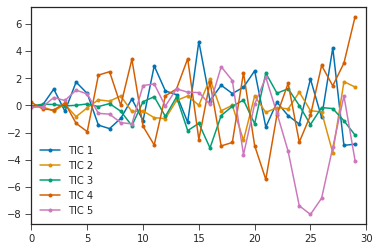

In [29]:
for i in range(5):
    plt.plot(tica_100.eigenvectors[i], ".-", label=f"TIC {i+1}")
plt.xlim([0, 30])
plt.legend()

In [17]:
tica_100.timescales

array([24076.72129454,  9666.8019619 ,  3075.50322671,  2179.9731138 ,
        1077.30377546,   895.44065225,   799.15776261,   703.44133398,
         675.76015724,   547.22357599,   505.47992072,   464.19909192,
         435.96920643,   397.48728628,   381.90199969,   360.83953443,
         343.7370066 ,   321.67655219,   295.32002952,   282.9477322 ,
         261.13101874,   231.06435652,   218.07665601,   191.89431282,
         175.59118619,   163.41815218,   141.09602488,   131.60920715,
         122.99914094,   114.1005071 ])

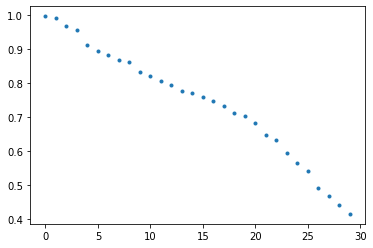

In [20]:
plt.plot(tica_100.eigenvalues, ".")

In [32]:
data_tica100_arr = np.concatenate(data_tica100)

## Data in TIC space 

Text(0, 0.5, 'TIC 2')

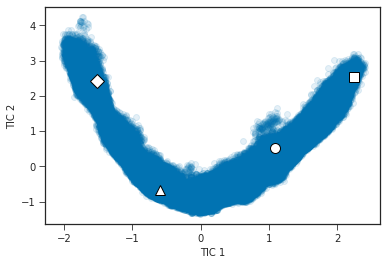

In [37]:
plt.scatter(data_tica100_arr[::10, 0], data_tica100_arr[::10, 1], alpha=0.1)
plt.plot(models_tica100[0, 0], models_tica100[0, 1], "s", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[1, 0], models_tica100[1, 1], "o", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[2, 0], models_tica100[2, 1], "^", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[3, 0], models_tica100[3, 1], "D", mec="k", mfc="w", ms=10)
plt.xlabel("TIC 1")
plt.ylabel("TIC 2")

Text(0, 0.5, 'TIC 3')

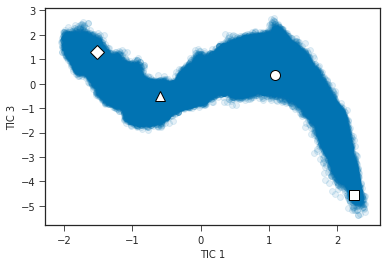

In [39]:
plt.scatter(data_tica100_arr[::10, 0], data_tica100_arr[::10, 2], alpha=0.1)
plt.plot(models_tica100[0, 0], models_tica100[0, 2], "s", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[1, 0], models_tica100[1, 2], "o", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[2, 0], models_tica100[2, 2], "^", mec="k", mfc="w", ms=10)
plt.plot(models_tica100[3, 0], models_tica100[3, 2], "D", mec="k", mfc="w", ms=10)
plt.xlabel("TIC 1")
plt.ylabel("TIC 3")

## TICA for another lag 

In [43]:
# try lag of 1000 timesteps (100 ns), calculate top 5 TICA components
tica_100 = pyemma.coordinates.tica(
    data=data_cz, lag=1000, dim=5, stride=1, chunksize=32
)

In [44]:
data_tica1000 = tica_100.transform(data_cz)

In [45]:
data_tica1000[0].shape

(3000, 5)

## Plot TICs 

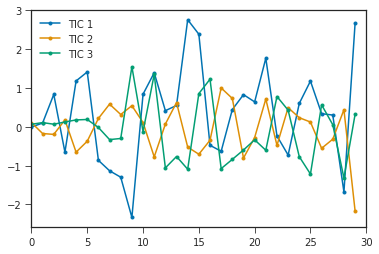

In [46]:
for i in range(3):
    plt.plot(tica_100.eigenvectors[i], ".-", label=f"TIC {i+1}")
plt.xlim([0, 30])
plt.legend()

In [47]:
tica_100.timescales

array([88610.86088574, 33380.00074081, 13000.83117144,  9972.32968553,
        4778.70845097,  3779.63390031,  3515.30681131,  3118.99202663,
        2854.18549255,  2615.39617952,  2314.20326303,  2123.73395741,
        1951.99791089,  1794.70290464,  1682.07757321,  1651.00896069,
        1519.91853952,  1506.13047937,  1345.82217918,  1305.31746752,
        1192.8880048 ,  1183.58036199,  1048.88616529,   963.58007391,
         922.04429149,   861.64272281,   790.24723769,   769.43415589,
         727.98838611,   702.59739215])

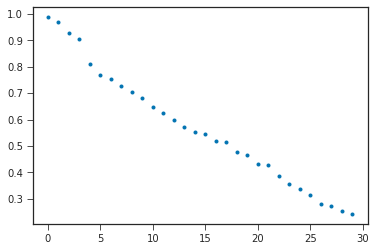

In [48]:
plt.plot(tica_100.eigenvalues, ".")

In [49]:
data_tica1000_arr = np.concatenate(data_tica1000)

In [50]:
models_tica1000 = tica_100.transform(models_cz)

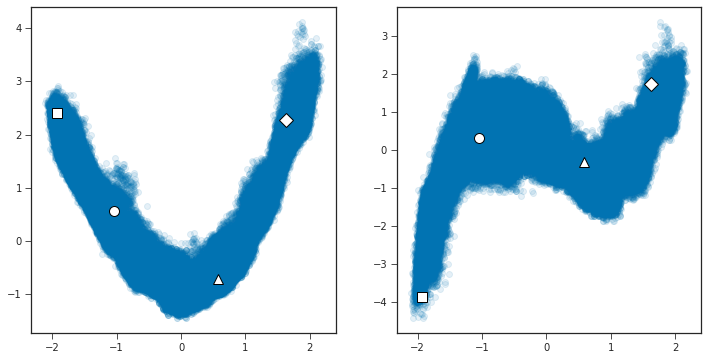

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(data_tica1000_arr[::10, 0], data_tica1000_arr[::10, 1], alpha=0.1)
util.plot_models(ax1, models_tica1000[:, :2])
ax2.scatter(data_tica1000_arr[::10, 0], data_tica1000_arr[::10, 2], alpha=0.1)
util.plot_models(ax2, models_tica1000[:, :3:2])

Text(0, 0.5, 'TIC 3')

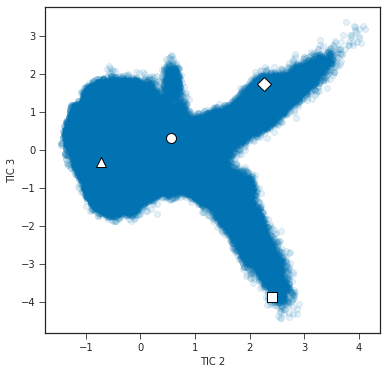

In [56]:
f, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data_tica1000_arr[::10, 1], data_tica1000_arr[::10, 2], alpha=0.1)
util.plot_models(ax, models_tica1000[:, 1:3])
plt.xlabel("TIC 2")
plt.ylabel("TIC 3")

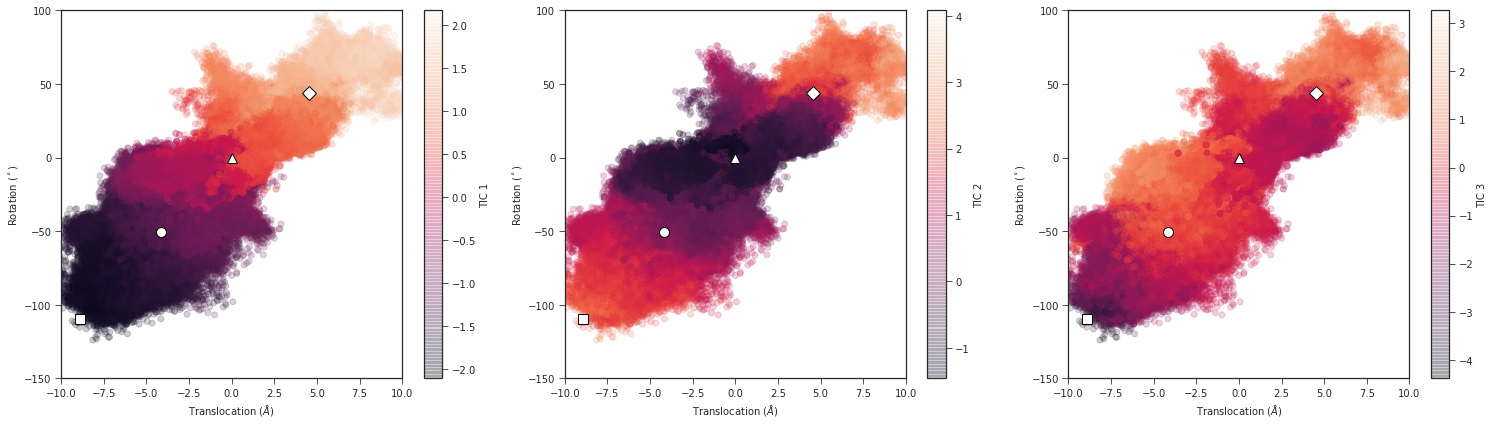

In [53]:
f, axs = plt.subplots(1, 3, figsize=(21, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(
        cv_arr[::20, 0],
        cv_arr[::20, 1],
        c=data_tica1000_arr[::20, i],
        cmap="rocket",
        alpha=0.2,
    )
    cbar = plt.colorbar(h, ax=ax)
    cbar.ax.set_ylabel(f"TIC {i+1}")
    util.format_cvs(ax)
f.tight_layout()

# Linear IVAC (integrated TICA)

In [4]:
import ivac

In [14]:
livac = ivac.LinearIVAC(
    minlag=1, maxlag=3000, nevecs=5, reweight=False, adjust=True, method="fft"
)

In [15]:
livac.fit(data_cz)

In [18]:
sns.set_context("talk")

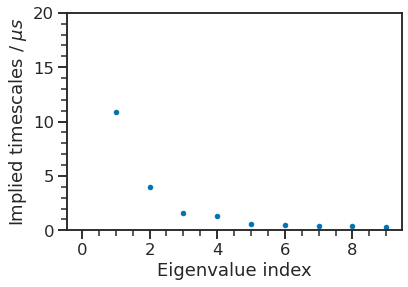

In [20]:
f, ax = plt.subplots()
plt.plot(livac.its[:10] * 0.0001, ".")  # in units of us
plt.ylabel("Implied timescales / $\mu s$")
plt.xlabel("Eigenvalue index")
plt.ylim([0, 20])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.savefig("../fig/talks/ivac-sb30-its", dpi=200)

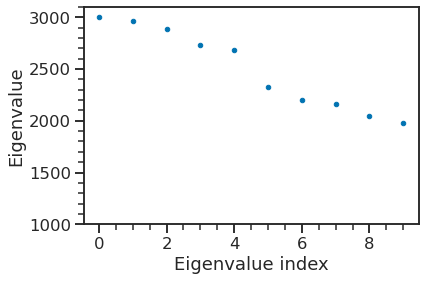

In [24]:
f, ax = plt.subplots()
plt.plot(livac.evals[:10], ".")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue")
plt.ylim([1000, 3100])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.savefig("../fig/ivac-sb30-evals", dpi=200)

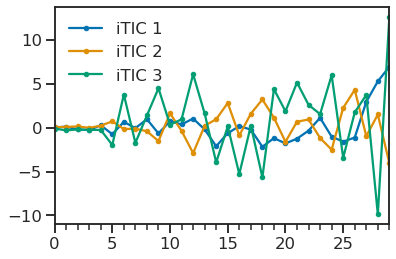

In [25]:
f, ax = plt.subplots()
for i in range(1, 4):
    plt.plot(livac.evecs[i], ".-", label=f"iTIC {i}")
plt.xlim([0, 29])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.legend()
plt.savefig("../fig/ivac-sb30-evecs", dpi=200)

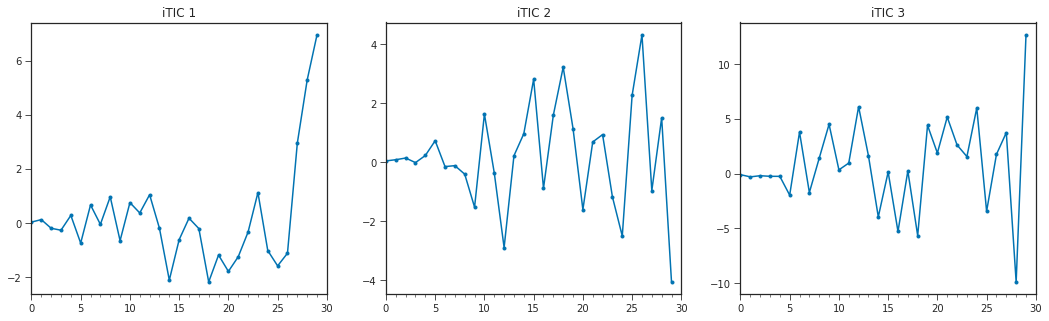

In [21]:
f, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axs):
    ax.plot(livac.evecs[i + 1], ".-")
    ax.set_xlim([0, 30])
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.set_title(f"iTIC {i+1}")

In [22]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "D186", "E183"):
        sb_labels.append(f"{r} - {n}")

In [23]:
tic1_pos = [29, 28, 27, 23]
tic1_neg = [14, 18, 20, 25]
print([sb_labels[idx] for idx in tic1_pos])
print([sb_labels[idx] for idx in tic1_neg])

['R232 - E183', 'R232 - D186', 'R232 - D164', 'R229 - E183']
['R226 - D151', 'R229 - D129', 'R229 - D151', 'R232 - D136']


In [24]:
tic2_pos = [26, 18, 15, 10]
tic2_neg = [28, 12, 24, 20]
print([sb_labels[idx] for idx in tic2_pos])
print([sb_labels[idx] for idx in tic2_neg])

['R232 - D151', 'R229 - D129', 'R226 - D164', 'R223 - D186']
['R232 - D186', 'R226 - D129', 'R232 - D129', 'R229 - D151']


In [30]:
tic3_pos = [29, 24, 12]
tic3_neg = [28, 18, 16, 14]
print([sb_labels[idx] for idx in tic3_pos])
print([sb_labels[idx] for idx in tic3_neg])

['R232 - E183', 'R232 - D129', 'R226 - D129']
['R232 - D186', 'R229 - D129', 'R226 - D186', 'R226 - D151']


## Plot TICs 

In [17]:
data_livac = livac.transform(data_cz)

In [18]:
data_livac[0].shape

(3000, 5)

In [19]:
data_livac_arr = np.concatenate(data_livac)

In [58]:
np.save("../data/sb-livac.npy", data_livac)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [28]:
model_livac = livac.transform([models_cz])

In [29]:
model_livac = model_livac[0]
model_livac.shape

(4, 5)

In [24]:
np.save("../data/models-livac.npy", model_livac)

In [27]:
data_livac = np.load("../data/sb-livac.npy", allow_pickle=True)
data_livac_arr = np.concatenate(data_livac)

In [30]:
model_livac

array([[-0.98501299, -1.83353403,  2.44585158, -3.8985908 ,  3.65670448],
       [-0.9761086 , -1.0438352 ,  0.61549798,  0.29510361, -0.37837104],
       [-0.99566638,  0.57695369, -0.74964031, -0.32272721,  0.25249829],
       [-0.9284679 ,  1.73080427,  2.26725656,  1.9748208 ,  0.91765332]])

In [32]:
model_livac = np.load("../data/models-livac.npy")

Note that for iVAC the trivial first eigenvector is included

Text(0, 0.5, 'iTIC 2')

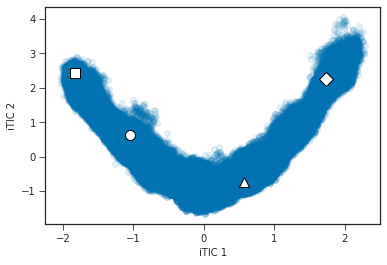

In [48]:
plt.scatter(data_livac_arr[::10, 1], data_livac_arr[::10, 2], alpha=0.1)
plt.plot(model_livac[0, 1], model_livac[0, 2], "s", mec="k", mfc="w", ms=10)
plt.plot(model_livac[1, 1], model_livac[1, 2], "o", mec="k", mfc="w", ms=10)
plt.plot(model_livac[2, 1], model_livac[2, 2], "^", mec="k", mfc="w", ms=10)
plt.plot(model_livac[3, 1], model_livac[3, 2], "D", mec="k", mfc="w", ms=10)
plt.xlabel("iTIC 1")
plt.ylabel("iTIC 2")

Text(0, 0.5, 'iTIC 3')

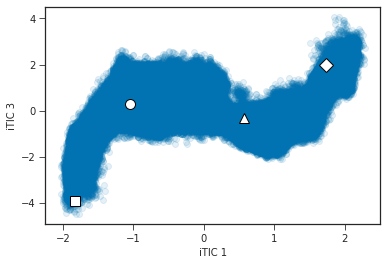

In [49]:
plt.scatter(data_livac_arr[::10, 1], data_livac_arr[::10, 3], alpha=0.1)
plt.plot(model_livac[0, 1], model_livac[0, 3], "s", mec="k", mfc="w", ms=10)
plt.plot(model_livac[1, 1], model_livac[1, 3], "o", mec="k", mfc="w", ms=10)
plt.plot(model_livac[2, 1], model_livac[2, 3], "^", mec="k", mfc="w", ms=10)
plt.plot(model_livac[3, 1], model_livac[3, 3], "D", mec="k", mfc="w", ms=10)
plt.xlabel("iTIC 1")
plt.ylabel("iTIC 3")

Text(0, 0.5, 'iTIC 3')

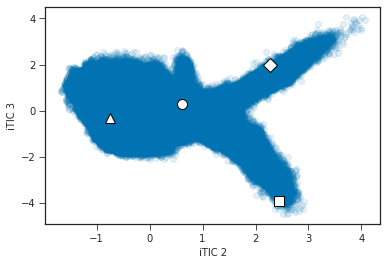

In [64]:
plt.scatter(data_livac_arr[::10, 2], data_livac_arr[::10, 3], alpha=0.1)
plt.plot(model_livac[0, 2], model_livac[0, 3], "s", mec="k", mfc="w", ms=10)
plt.plot(model_livac[1, 2], model_livac[1, 3], "o", mec="k", mfc="w", ms=10)
plt.plot(model_livac[2, 2], model_livac[2, 3], "^", mec="k", mfc="w", ms=10)
plt.plot(model_livac[3, 2], model_livac[3, 3], "D", mec="k", mfc="w", ms=10)
plt.xlabel("iTIC 2")
plt.ylabel("iTIC 3")

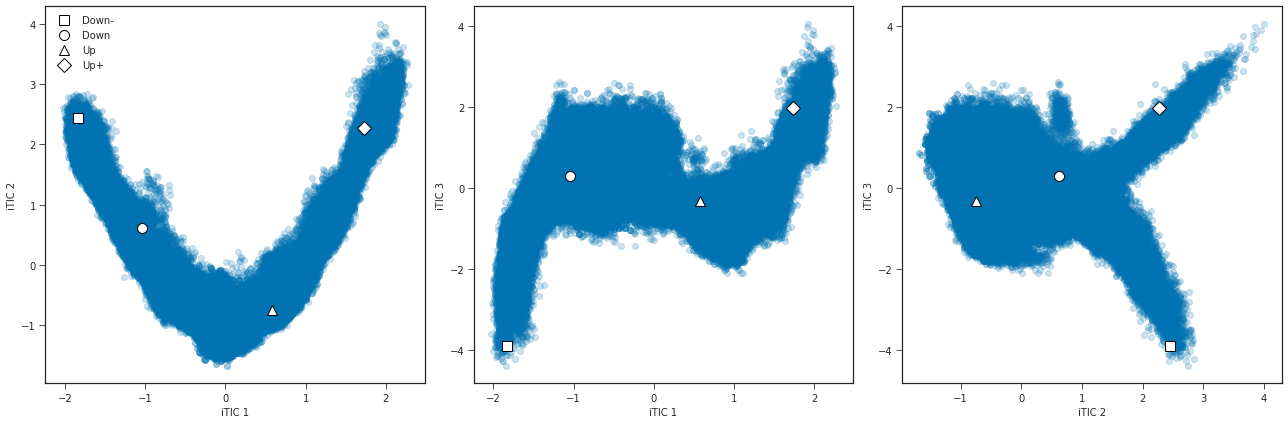

In [51]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for (i, j), ax in zip(combinations(range(1, 4), 2), axs):
    h = ax.scatter(data_livac_arr[::20, i], data_livac_arr[::20, j], alpha=0.2)
    ax.set_xlabel(f"iTIC {i}")
    ax.set_ylabel(f"iTIC {j}")

util.plot_models(axs[0], model_livac[:, 1:3])
util.plot_models(axs[1], model_livac[:, 1:4:2])
util.plot_models(axs[2], model_livac[:, 2:4])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()
plt.savefig("../fig/ivac-sb-iTICs-dens")

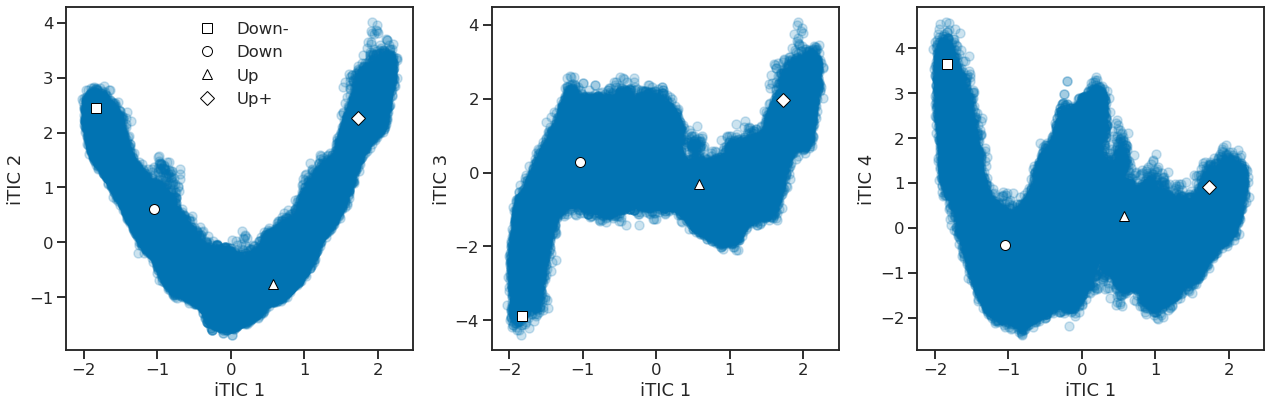

In [34]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(data_livac_arr[::20, 1], data_livac_arr[::20, i + 2], alpha=0.2)
    ax.set_xlabel(f"iTIC {1}")
    ax.set_ylabel(f"iTIC {i + 2}")

util.plot_models(axs[0], model_livac[:, 1:3])
util.plot_models(axs[1], model_livac[:, 1:4:2])
util.plot_models(axs[2], model_livac[:, 1:5:3])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()
plt.savefig("../fig/talks/ivac-sb30-iTIC1234-dens", dpi=300)

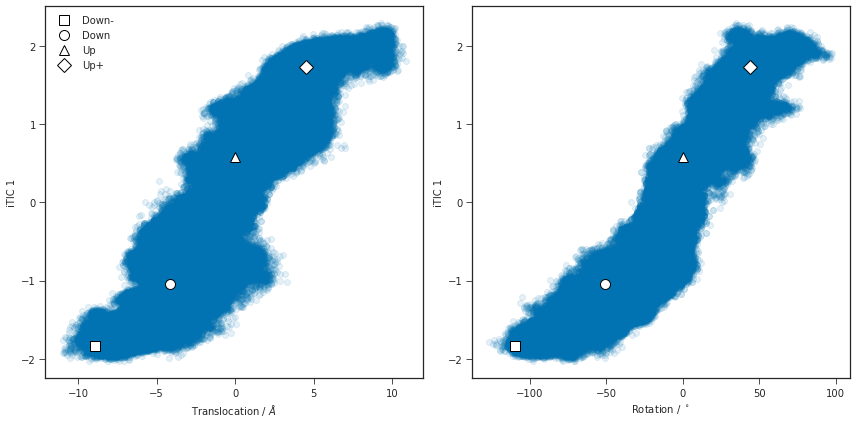

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(cv_arr[::10, 0], data_livac_arr[::10, 1], alpha=0.1)
ax1.plot(-8.919, model_livac[0, 1], "s", mec="k", mfc="w", ms=10)
ax1.plot(-4.174, model_livac[1, 1], "o", mec="k", mfc="w", ms=10)
ax1.plot(0, model_livac[2, 1], "^", mec="k", mfc="w", ms=10)
ax1.plot(4.535, model_livac[3, 1], "D", mec="k", mfc="w", ms=10)

ax1.set_xlabel("Translocation / $\AA$")
ax1.set_ylabel("iTIC 1")

ax2.scatter(cv_arr[::10, 1], data_livac_arr[::10, 1], alpha=0.1)
ax2.plot(-109.9, model_livac[0, 1], "s", mec="k", mfc="w", ms=10)
ax2.plot(-50.8, model_livac[1, 1], "o", mec="k", mfc="w", ms=10)
ax2.plot(0, model_livac[2, 1], "^", mec="k", mfc="w", ms=10)
ax2.plot(43.7, model_livac[3, 1], "D", mec="k", mfc="w", ms=10)

ax2.set_xlabel("Rotation / $^\circ$")
ax2.set_ylabel("iTIC 1")

ax1.legend(["Down-", "Down", "Up", "Up+"])

f.tight_layout()
plt.savefig("../fig/ivac-sb-iTICs-ds-dens", dpi=300)

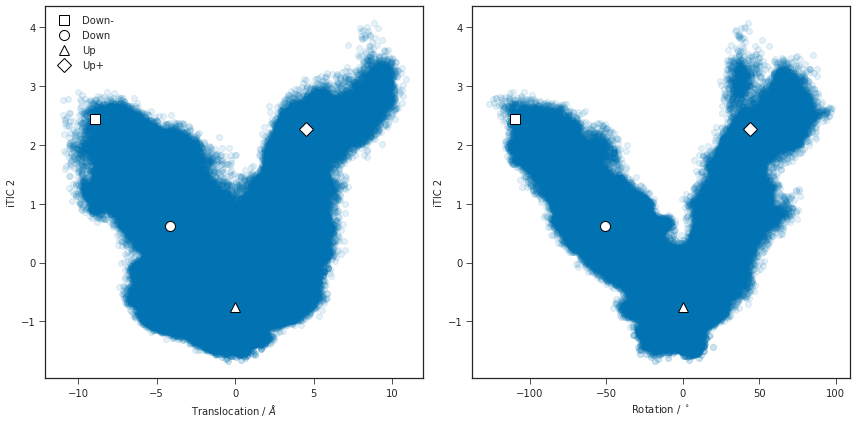

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(cv_arr[::10, 0], data_livac_arr[::10, 2], alpha=0.1)
ax1.plot(-8.919, model_livac[0, 2], "s", mec="k", mfc="w", ms=10)
ax1.plot(-4.174, model_livac[1, 2], "o", mec="k", mfc="w", ms=10)
ax1.plot(0, model_livac[2, 2], "^", mec="k", mfc="w", ms=10)
ax1.plot(4.535, model_livac[3, 2], "D", mec="k", mfc="w", ms=10)

ax1.set_xlabel("Translocation / $\AA$")
ax1.set_ylabel("iTIC 2")

ax2.scatter(cv_arr[::10, 1], data_livac_arr[::10, 2], alpha=0.1)
ax2.plot(-109.9, model_livac[0, 2], "s", mec="k", mfc="w", ms=10)
ax2.plot(-50.8, model_livac[1, 2], "o", mec="k", mfc="w", ms=10)
ax2.plot(0, model_livac[2, 2], "^", mec="k", mfc="w", ms=10)
ax2.plot(43.7, model_livac[3, 2], "D", mec="k", mfc="w", ms=10)

ax2.set_xlabel("Rotation / $^\circ$")
ax2.set_ylabel("iTIC 2")

ax1.legend(["Down-", "Down", "Up", "Up+"])

f.tight_layout()
plt.savefig("../fig/ivac-sb-iTICs2-ds-dens", dpi=300)

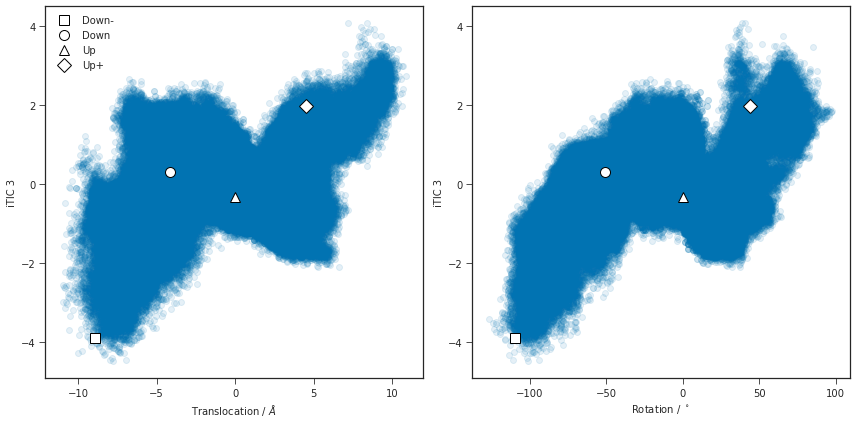

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(cv_arr[::10, 0], data_livac_arr[::10, 3], alpha=0.1)
ax1.plot(-8.919, model_livac[0, 3], "s", mec="k", mfc="w", ms=10)
ax1.plot(-4.174, model_livac[1, 3], "o", mec="k", mfc="w", ms=10)
ax1.plot(0, model_livac[2, 3], "^", mec="k", mfc="w", ms=10)
ax1.plot(4.535, model_livac[3, 3], "D", mec="k", mfc="w", ms=10)

ax1.set_xlabel("Translocation / $\AA$")
ax1.set_ylabel("iTIC 3")

ax2.scatter(cv_arr[::10, 1], data_livac_arr[::10, 3], alpha=0.1)
ax2.plot(-109.9, model_livac[0, 3], "s", mec="k", mfc="w", ms=10)
ax2.plot(-50.8, model_livac[1, 3], "o", mec="k", mfc="w", ms=10)
ax2.plot(0, model_livac[2, 3], "^", mec="k", mfc="w", ms=10)
ax2.plot(43.7, model_livac[3, 3], "D", mec="k", mfc="w", ms=10)

ax2.set_xlabel("Rotation / $^\circ$")
ax2.set_ylabel("iTIC 3")

ax1.legend(["Down-", "Down", "Up", "Up+"])

f.tight_layout()
plt.savefig("../fig/ivac-sb-iTICs3-ds-dens", dpi=300)

## Plot iTICs in CV space 

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(22, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(
        cv_arr[::20, 0],
        cv_arr[::20, 1],
        c=data_livac_arr[::20, i + 1],
        cmap="rocket",
        alpha=0.1,
    )
    cbar = plt.colorbar(h, ax=ax)
    cbar.ax.set_ylabel(f"iTIC {i+1}")
    cbar.solids.set(alpha=1)
    util.format_cvs(ax)
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

plt.savefig("../fig/talks/ivac-sb30-ds-iTIC-proj", dpi=300)

In [27]:
from itertools import combinations

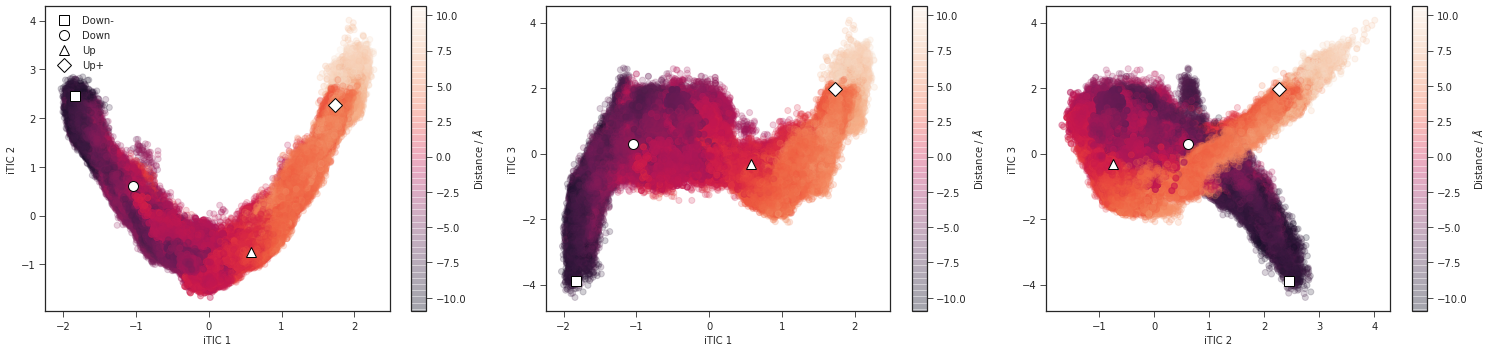

In [59]:
f, axs = plt.subplots(1, 3, figsize=(21, 5))
for (i, j), ax in zip(combinations(range(1, 4), 2), axs):
    h = ax.scatter(
        data_livac_arr[::20, i],
        data_livac_arr[::20, j],
        c=cv_arr[::20, 0],
        cmap="rocket",
        alpha=0.2,
    )
    cbar = plt.colorbar(h, ax=ax)
    cbar.ax.set_ylabel("Distance / $\AA$")
    ax.set_xlabel(f"iTIC {i}")
    ax.set_ylabel(f"iTIC {j}")

util.plot_models(axs[0], model_livac[:, 1:3])
util.plot_models(axs[1], model_livac[:, 1:4:2])
util.plot_models(axs[2], model_livac[:, 2:4])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

plt.savefig("../fig/ivac-sb-iTICs-dist-proj", dpi=300)

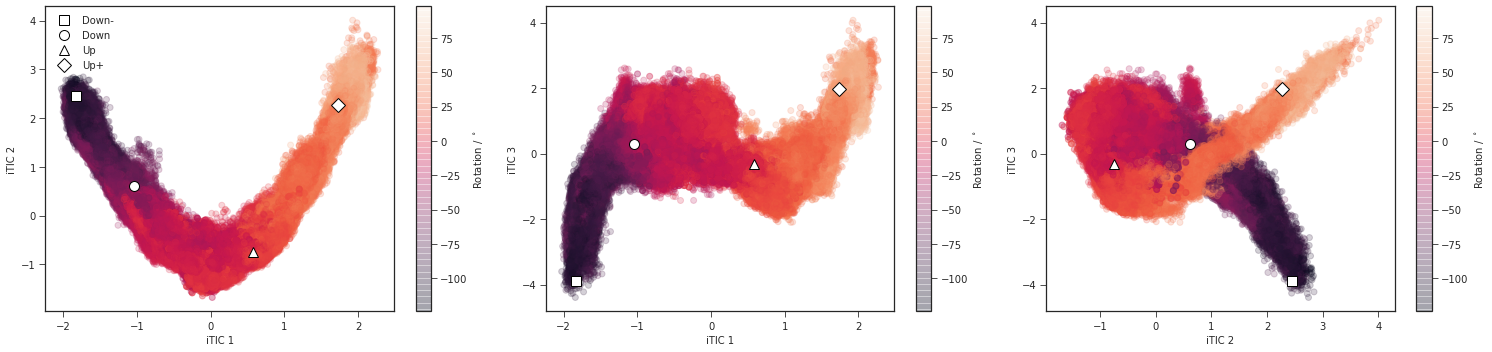

In [60]:
f, axs = plt.subplots(1, 3, figsize=(21, 5))
for (i, j), ax in zip(combinations(range(1, 4), 2), axs):
    h = ax.scatter(
        data_livac_arr[::20, i],
        data_livac_arr[::20, j],
        c=cv_arr[::20, 1],
        cmap="rocket",
        alpha=0.2,
    )
    cbar = plt.colorbar(h, ax=ax)
    cbar.ax.set_ylabel("Rotation / $^\circ$")
    ax.set_xlabel(f"iTIC {i}")
    ax.set_ylabel(f"iTIC {j}")

util.plot_models(axs[0], model_livac[:, 1:3])
util.plot_models(axs[1], model_livac[:, 1:4:2])
util.plot_models(axs[2], model_livac[:, 2:4])
axs[0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

plt.savefig("../fig/ivac-sb-iTICs-spin-proj", dpi=300)

# PCA

In [31]:
pca = pyemma.coordinates.pca(data=data_cz, dim=5, chunksize=32)

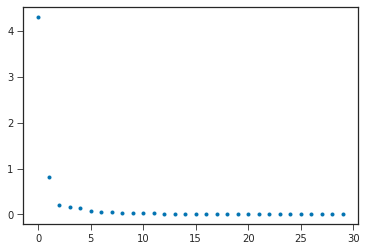

In [32]:
plt.plot(pca.eigenvalues, ".")

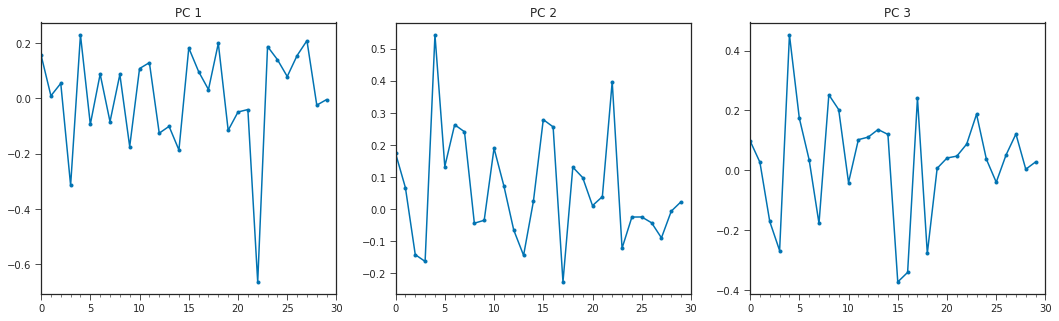

In [41]:
f, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axs):
    ax.plot(pca.eigenvectors[i], ".-")
    ax.set_xlim([0, 30])
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.set_title(f"PC {i+1}")

In [35]:
data_pca = pca.transform(data_cz)

In [36]:
data_pca_arr = np.concatenate(data_pca)

In [37]:
model_pca = pca.transform(models_cz)

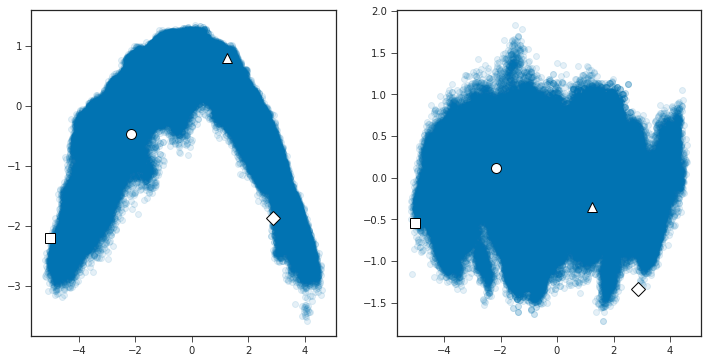

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(data_pca_arr[::10, 0], data_pca_arr[::10, 1], alpha=0.1)
util.plot_models(ax1, model_pca[:, :2])
ax2.scatter(data_pca_arr[::10, 0], data_pca_arr[::10, 2], alpha=0.1)
util.plot_models(ax2, model_pca[:, :3:2])

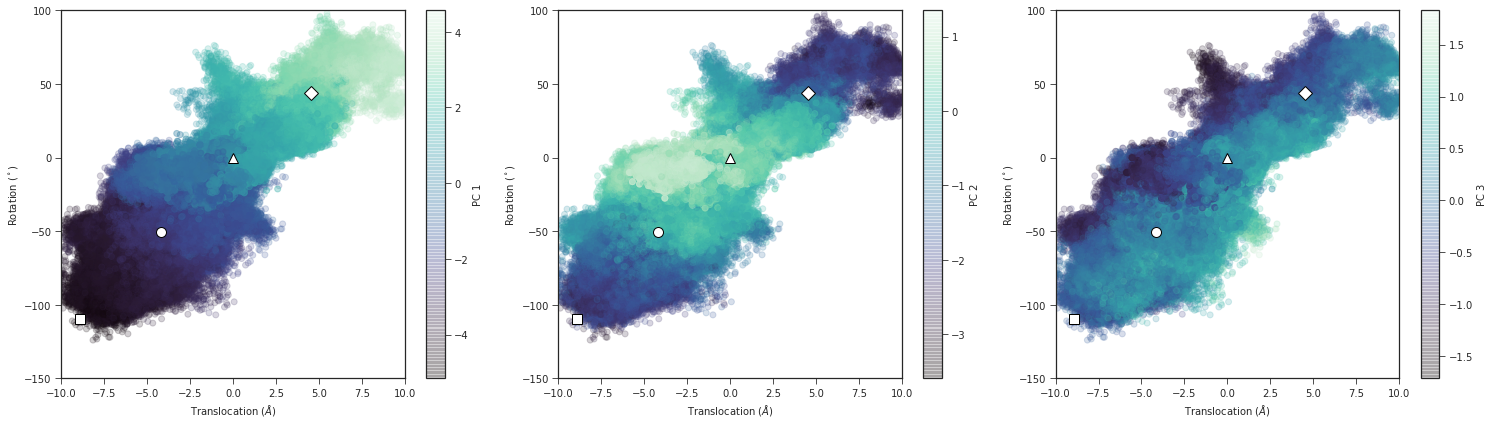

In [42]:
f, axs = plt.subplots(1, 3, figsize=(21, 6))
for i, ax in enumerate(axs):
    h = ax.scatter(
        cv_arr[::20, 0],
        cv_arr[::20, 1],
        c=data_pca_arr[::20, i],
        cmap="mako",
        alpha=0.2,
    )
    cbar = plt.colorbar(h, ax=ax)
    cbar.ax.set_ylabel(f"PC {i+1}")
    util.format_cvs(ax)
f.tight_layout()